# Pima Indian Diabetes Prediction

Import some basic libraries  
  * pandas - for data frames
  * matplotlib.pyplot - plotting support  
  
**Tip**: use `%matplotlib inline` to display graphics inline instead of in a pop-up

In [1]:
import pandas as pd                 # Pandas is a dataframe library
import matplotlib.pyplot as plt     # matplotlib.pyplot plots data

%matplotlib inline

## Loading and reviewing data

In [2]:
df = pd.read_csv("../data/pima-data.csv") # where df = pandas DataFrame

In [3]:
df.shape # shape is a variable and not function in df

(768, 10)

In [4]:
df.head(5) # show top 5 records

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
df.tail(5) # show last 5 records

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


**Features:** data which contributes in outcome directly
**Column:** a data in column not necesarily feature 
**Class:** Outcome

### Definition of features
From the data, we can have following definitions of the features

| Feature  | Description | Comments |
|--------------|-------------|--------|
| num_preg     | number of pregnancies         |
| glucose_conc | Plasma glucose concentration a 2 hours in an oral glucose tolerance test         |
| diastolic_bp | Diastolic blood pressure (mm Hg) |
| thickness | Triceps skin fold thickness (mm) |
|insulin | 2-Hour serum insulin (mu U/ml) |
| bmi |  Body mass index (weight in kg/(height in m)^2) |
| diab_pred |  Diabetes pedigree function |
| Age (years) | Age (years)|
| skin | ???? | What is this? |
| diabetes | Class variable (1=True, 0=False) |  Why is our data boolean (True/False)? |

## Check if null values are present in the data set

In [6]:
# df.isnull() # prints all the data with true or false
# df.isnull().values # returns array with the value as false or true
df.isnull().values.any() # 

False

## Check for correlated data (makes prediction biased by giving the same type of information double weightage)

Helper function that displays correlation by color.  Red is most correlated, Blue least.

In [7]:
def plot_correlation(df,size =8):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot, initialized default with 8

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """
    
    correlation = df.corr() # data frame collection function
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(correlation) # color code the rectangles by correlation value
    plt.xticks(range(len(correlation.columns)), correlation.columns) # draw x tick marks
    plt.yticks(range(len(correlation.columns)), correlation.columns) # draw y tick marks
    
    
    

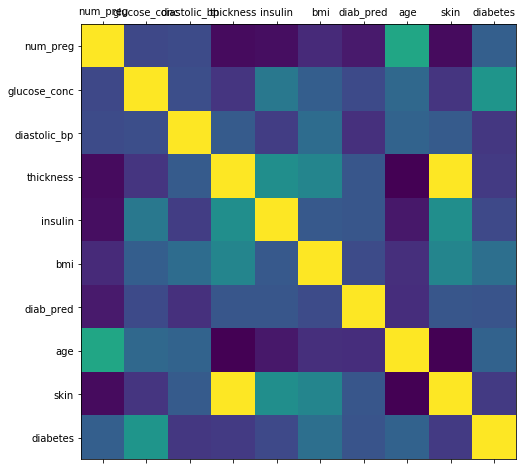

In [8]:
plot_correlation(df)

In [9]:
df.corr()  # plot the correlation from data frame 

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


The skin and thickness columns are correlated 1 to 1.  Dropping the skin column

In [10]:
del df['skin']

In [11]:
df.head(5)  # verify if the column is dropped or not

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


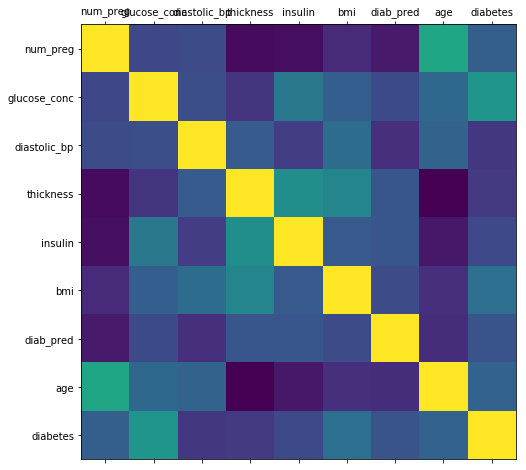

In [12]:
plot_correlation(df) # plot again to check for additional correlation

# Mold data

## Check data types
Inspect data types to see if there are any issues. Data should be **Numeric** 

In [13]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


only diabetes column is not numeric, change diabetes from boolean to integer, True = 1, False = 0

In [14]:
diabetes_map = {True:1, False:0} # create map required for replacing

In [15]:
df['diabetes'] = df['diabetes'].map(diabetes_map) # replace

In [16]:
df.head(5) # verify if the data is replaced correctly

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Check for null values

In [17]:
df.isnull().values.any()

False

## Check class distribution

Rare events are hard to predict. Make sure you have data for both true and false in comparable ratio

In [18]:
num_total = len(df)
num_true = len(df.loc[df['diabetes']==1])
num_false = len(df.loc[df['diabetes']==0])
print("number of true cases: {0} ({1:2.2f}%)".format(num_true,(num_true/num_total)*100))
print("number of false cases: {0} ({1:2.2f}%)".format(num_false,(num_false/num_total)*100))

number of true cases: 268 (34.90%)
number of false cases: 500 (65.10%)


Here, we can see true and false are in good ratio, so no extra work needed

## Splitting the data
70% for training and 30% for testing

In [19]:
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

x = df[feature_col_names].values       # Predictor, feature columns (8)
y = df[predicted_class_names].values   # Predicted class (1/true. 0/false) column(1)
split_test_size= 0.30 # test_size = 0.30 is 30%

# random_state=42 helps in dividing the data and getting the same number of records everytime you run
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=split_test_size, random_state=42)

We can cross verify to ensure that we have 30% test and 70% training data 

In [20]:
# print(df.index) # RangeIndex(start=0, stop=768, step=1)
# print(len(df.index)) # 768
# print(len(x_train)) # 537
# below if you keep the float formatting to 1:2.2f you will get out of index error
print("{0:2.2f}% in training set".format((len(x_train)/len(df.index))*100)) 
print("{0:2.2f}% in test set".format(len(x_test)/len(df.index)*100))

69.92% in training set
30.08% in test set


Now we have to ensure that % of true and false is also in proper ratio

In [63]:
print("Original True  : {0} ({1:2.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))

print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/ len(y_train)) * 100.0))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/ len(y_train)) * 100.0))

print("Test True  : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/ len(y_test)) * 100.0))
print("Test False : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/ len(y_test)) * 100.0))


Original True  : 268 (34.90%)
Original False : 500 (65.10%)
Training True  : 188 (35.01%)
Training False : 349 (64.99%)
Test True  : 80 (34.63%)
Test False : 151 (65.37%)
